In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor


In [23]:
excer= pd.read_csv('data/calories/exercise (2).csv')
calories=pd.read_csv('data/calories/calories (3).csv')

df = pd.merge(excer, calories, on='User_ID', how='inner')

In [24]:
df.replace({'male': 0, 'female': 1},
           inplace=True)
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_8008\2131168310.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'male': 0, 'female': 1},


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


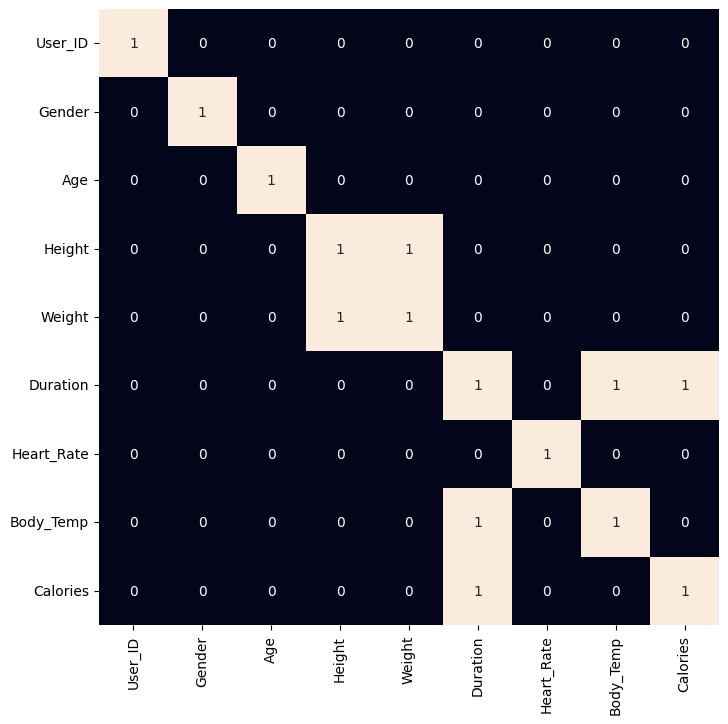

In [25]:
plt.figure(figsize=(8, 8))
sb.heatmap(df.corr() > 0.9,
           annot=True,
           cbar=False)
plt.show()


In [26]:
to_remove = ['Weight', 'Duration']
df.drop(to_remove, axis=1, inplace=True)

In [27]:
features = df.drop(['User_ID', 'Calories'], axis=1)
target = df['Calories'].values

X_train, X_val,\
    Y_train, Y_val = train_test_split(features, target,
                                      test_size=0.1,
                                      random_state=22)
X_train.shape, X_val.shape

((13500, 5), (1500, 5))

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [29]:
from sklearn.metrics import mean_absolute_error as mae
models = [LinearRegression(), XGBRegressor(),
          Lasso(), RandomForestRegressor(), Ridge()]

for i in range(5):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')

    train_preds = models[i].predict(X_train)
    print('Training Error : ', mae(Y_train, train_preds))

    val_preds = models[i].predict(X_val)
    print('Validation Error : ', mae(Y_val, val_preds))
    print()


LinearRegression() : 
Training Error :  17.893463692619434
Validation Error :  18.007896272831253

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Error :  7.89463304294701
Validation Error :  10.12050432946533

Lasso() : 
Training Error :  17.915089584958036
Validation Error :  17.995033

In [31]:
models[1]

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [33]:
from joblib import dump, load
dump(models[1], 'xgr_calories.joblib')

['xgr_calories.joblib']

In [34]:
X_train

array([[-1.0049009 , -0.75438447,  0.59752078, -0.68601212,  0.3461739 ],
       [-1.0049009 , -1.16660926,  0.45728207, -0.26870631,  0.47482765],
       [-1.0049009 , -0.10660264,  0.31704336,  0.56590533,  0.98944266],
       ...,
       [ 0.995123  ,  0.48228993, -2.97856629, -0.99899149, -1.06901739],
       [ 0.995123  , -1.34327703, -0.59450824, -0.37303276, -0.29709487],
       [ 0.995123  ,  1.42451804,  0.17680465, -1.4162973 , -1.84093991]],
      shape=(13500, 5))

In [35]:
features

,Gender,Age,Height,Heart_Rate,Body_Temp
0,0,68,190.0,105.0,40.8
1,1,20,166.0,94.0,40.3
2,0,69,179.0,88.0,38.7
3,1,34,179.0,100.0,40.5
4,1,27,154.0,81.0,39.8
...,...,...,...,...,...
14995,1,20,193.0,92.0,40.4
14996,1,27,165.0,85.0,39.2
14997,1,43,159.0,90.0,40.1
14998,0,78,193.0,84.0,38.3
